# 📊 Store Sales Time Series Forecasting - Data Dictionary

---

## 1️⃣ Train Data (Sales Data)
📌 Contains historical daily sales data for each store and product family.

| Column Name   | Description |
|---------------|-------------|
| `id`          | Unique identifier for each record. |
| `date`        | Date of the sale. |
| `store_nbr`   | Store number where the sale occurred. |
| `family`      | Product family (e.g., beverages, canned foods, etc.). |
| `sales`       | Number of units sold on that day. |
| `onpromotion` | Number of products on promotion that day. |

---

## 2️⃣ Test Data (Future Data)
📌 Same structure as the "Train" data but without sales, as the goal is to predict sales for these records.

| Column Name   | Description |
|---------------|-------------|
| `id`          | Unique identifier for each record. |
| `date`        | The date for which sales prediction is required. |
| `store_nbr`   | Store number. |
| `family`      | Product family. |
| `onpromotion` | Number of products on promotion that day. |

---

## 3️⃣ Stores Data
📌 Metadata about each store, such as location and type.

| Column Name   | Description |
|---------------|-------------|
| `store_nbr`   | Store number (links this dataset with sales data). |
| `city`        | The city where the store is located. |
| `state`       | The state or region of the store. |
| `type`        | Store type (A, B, C, D). |
| `cluster`     | Store's cluster based on customer behavior patterns. |

---

## 4️⃣ Oil Prices Data
📌 Daily oil prices that may impact economic conditions and sales.

| Column Name   | Description |
|---------------|-------------|
| `date`        | Date of oil price record. |
| `dcoilwtico`  | Price of a barrel of crude oil. |

---

## 5️⃣ Holidays & Events Data
📌 Contains information about holidays and special events that may influence sales.

| Column Name   | Description |
|---------------|-------------|
| `date`        | Date of the holiday or event. |
| `type`        | Type of event (e.g., National Holiday, Sporting Event, Religious, etc.). |
| `locale`      | Where the event is celebrated (`National`, `Regional`, `Local`). |
| `locale_name` | Name of the region or city affected by the holiday. |
| `description` | Description of the holiday or event. |
| `transferred` | Whether the event was transferred to another day (`True` or `False`). |

---

## 6️⃣ Transactions Data
📌 Daily transaction counts per store.

| Column Name   | Description |
|---------------|-------------|
| `date`        | Date of the transactions. |
| `store_nbr`   | Store number where transactions occurred. |
| `transactions`| Number of transactions on that day. |

---

🔹 **Now you have a well-organized reference for each column in every dataset, which will help you with analysis and accurate sales forecasting! 🚀**  


_____________________________________________________________________
# **ERD**
This is an Entity-Relationship Diagram (ERD) that illustrates the relationships between the different tables (entities) in the dataset, along with their respective attributes. Each entity represents a data table such as sales, stores, holidays, oil prices, and transactions. The diagram helps visualize how these entities are linked together through keys and shared fields, enabling comprehensive analysis and integration of the data.


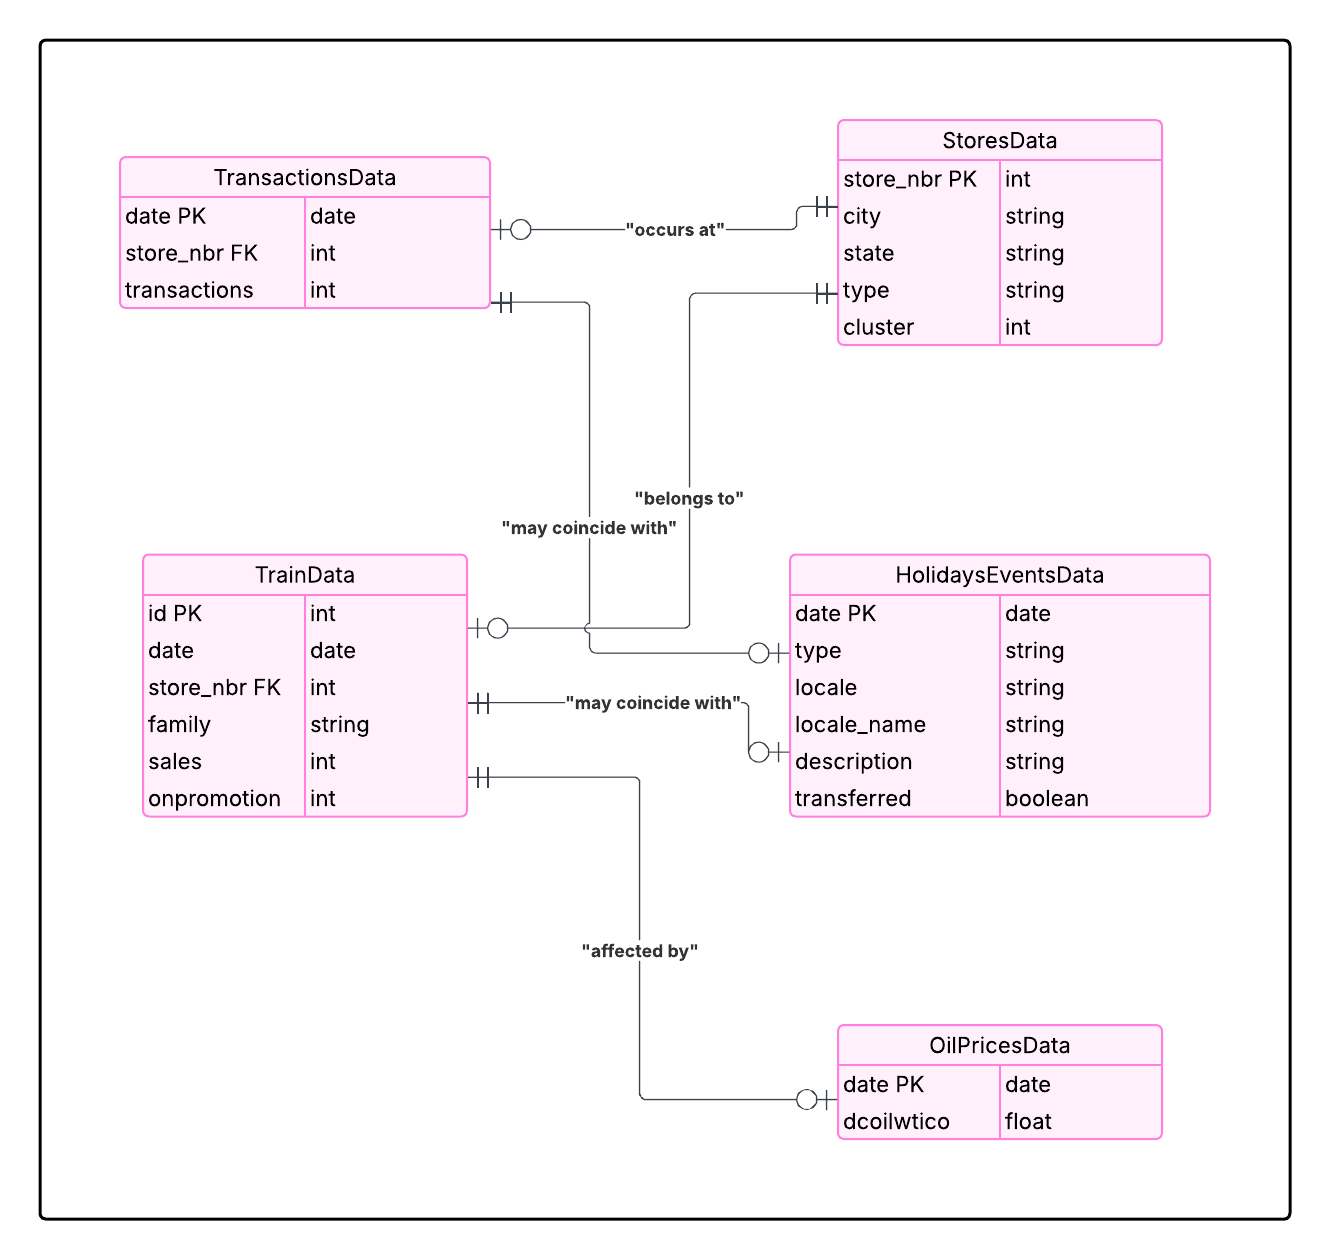

## Importing Libiraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import RobustScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from scipy.stats import pearsonr
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

## Load Datasets

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


In [4]:
train = pd.read_csv("/kaggle/input/sales-forcasting-depi-final-project/train.csv", parse_dates=["date"])
test = pd.read_csv("/kaggle/input/sales-forcasting-depi-final-project/test.csv", parse_dates=["date"])
stores = pd.read_csv("/kaggle/input/sales-forcasting-depi-final-project/stores.csv")
oil = pd.read_csv("/kaggle/input/sales-forcasting-depi-final-project/oil.csv", parse_dates=["date"])
holidays = pd.read_csv("/kaggle/input/sales-forcasting-depi-final-project/holidays_events.csv", parse_dates=["date"])
transactions = pd.read_csv("/kaggle/input/sales-forcasting-depi-final-project/transactions.csv", parse_dates=["date"])


In [5]:
# Check Null Values & Duplicates
print(train.isnull().sum())
print(train[train.duplicated()])
train.dropna(inplace=True)

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion]
Index: []


In [6]:
# Check Null Values & Duplicates
print(test.isnull().sum())
print(test[test.duplicated()])

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
Empty DataFrame
Columns: [id, date, store_nbr, family, onpromotion]
Index: []


In [7]:
# Check Null Values & Duplicates
print(stores.isnull().sum())
print(stores[stores.duplicated()])

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
Empty DataFrame
Columns: [store_nbr, city, state, type, cluster]
Index: []


In [8]:
# Check Null Values & Duplicates
print(oil.isnull().sum())
print(oil[oil.duplicated()])
print(oil.shape)
oil.dropna(inplace=True)

date           0
dcoilwtico    43
dtype: int64
Empty DataFrame
Columns: [date, dcoilwtico]
Index: []
(1218, 2)


In [9]:
# Check Null Values & Duplicates
print(holidays.isnull().sum())
print(holidays[holidays.duplicated()])

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
Empty DataFrame
Columns: [date, type, locale, locale_name, description, transferred]
Index: []


In [10]:
# Check Null Values & Duplicates
print(transactions.isnull().sum())
print(transactions[transactions.duplicated()])

date            0
store_nbr       0
transactions    0
dtype: int64
Empty DataFrame
Columns: [date, store_nbr, transactions]
Index: []


## Exploratory Data Analysis

In [11]:
# EDA for Train
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [12]:
# Check for data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [13]:
train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703087872,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


### Observation
#### We can see that the march and january is the most sales

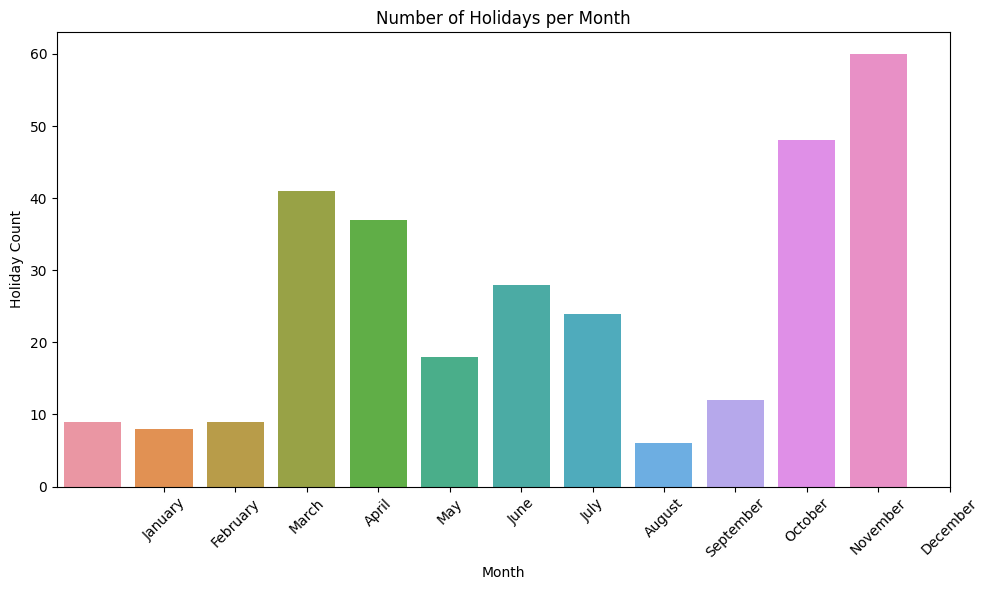

In [14]:
# Remove transferred holidays (optional: keep only real holidays)
holidays = holidays[holidays['transferred'] == False]

# Drop duplicates in case same day appears multiple times
holidays_unique = holidays.drop_duplicates(subset=['date'])

# Extract month
holidays_unique['month'] = holidays_unique['date'].dt.month

# Count holidays per month
holidays_per_month = holidays_unique['month'].value_counts().sort_index()

# Month labels
month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=holidays_per_month.index, y=holidays_per_month.values)
plt.title('Number of Holidays per Month')
plt.xlabel('Month')
plt.ylabel('Holiday Count')
plt.xticks(ticks=range(1, 13), labels=month_labels, rotation=45)
plt.tight_layout()
plt.show()


## Observation
### We can see the Novamber has most holidays

## Observation
### we can see That the average sale is high in the sunday because it is the weekend

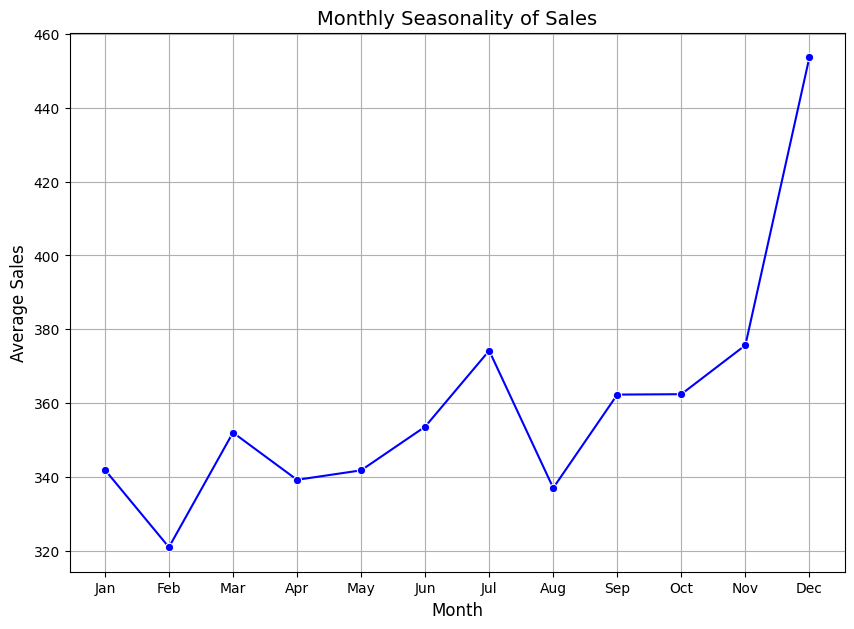

In [15]:
train["month"] = train["date"].dt.month

monthly_sales = train.groupby("month")["sales"].mean().reset_index()

plt.figure(figsize=(10, 7))
sns.lineplot(x="month", y="sales", data=monthly_sales, marker="o", color="blue")

plt.title("Monthly Seasonality of Sales", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)

plt.show()



### Observation
#### The Nov has most sales because it has most holidays

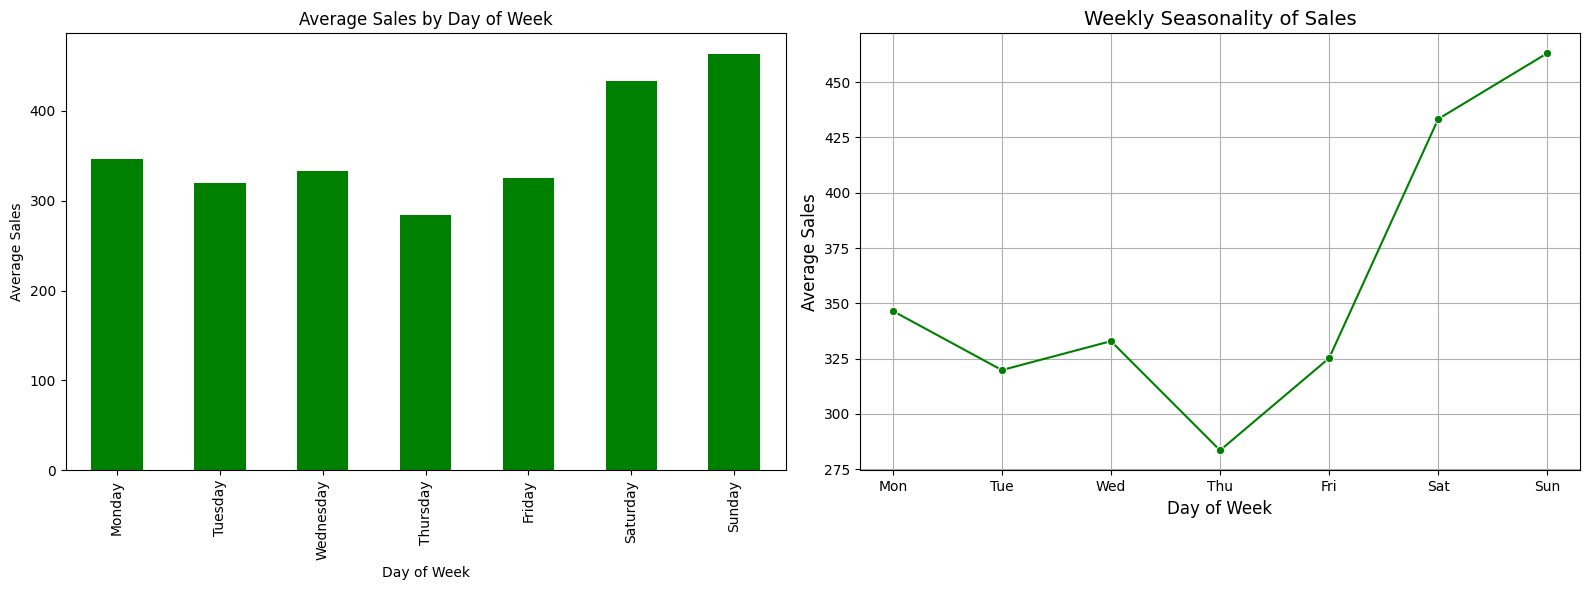

In [16]:
# Extract the day of the week from the 'date' column
train['day_of_week'] = train['date'].dt.day_name()

# Calculate the average sales for each day of the week
avg_sales_by_day = train.groupby('day_of_week')['sales'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Prepare the data for the line plot (weekly sales)
train["day_of_week"] = train["date"].dt.dayofweek
weekly_sales = train.groupby("day_of_week")["sales"].mean().reset_index()

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot to show average sales by day of the week
avg_sales_by_day.plot(kind='bar', ax=axes[0], color='green', title='Average Sales by Day of Week', legend=False)
axes[0].set_ylabel('Average Sales')
axes[0].set_xlabel('Day of Week')

# Line plot to show weekly seasonality of sales
sns.lineplot(x="day_of_week", y="sales", data=weekly_sales, marker="o", color="green", ax=axes[1])
axes[1].set_title("Weekly Seasonality of Sales", fontsize=14)
axes[1].set_xlabel("Day of Week", fontsize=12)
axes[1].set_ylabel("Average Sales", fontsize=12)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[1].grid(True)

# Adjust layout to avoid overlap and show the plots
plt.tight_layout()
plt.show()


### Observation
#### The sales is increasing in weekend (Saturday , Sunday)

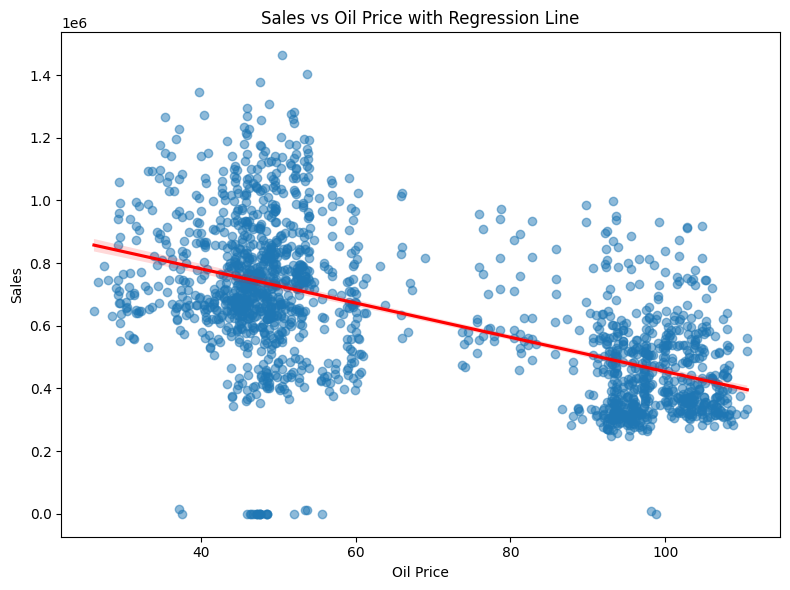

In [17]:
# Create a complete date range from min to max date in both datasets
date_range = pd.date_range(start=min(train['date'].min(), oil['date'].min()),
                           end=max(train['date'].max(), oil['date'].max()))
full_dates = pd.DataFrame({'date': date_range})

# Aggregate daily sales
daily_sales = train.groupby('date')['sales'].sum().reset_index()

# Merge into a full time-series
merged = full_dates.merge(daily_sales, on='date', how='left')
merged = merged.merge(oil, on='date', how='left')

# Fill missing values
merged['sales'] = merged['sales'].fillna(0)
merged['dcoilwtico'] = merged['dcoilwtico'].fillna(method='ffill')


# ----- Plot: Regplot -----
plt.figure(figsize=(8,6))
sns.regplot(data=merged, x='dcoilwtico', y='sales', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Sales vs Oil Price with Regression Line')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


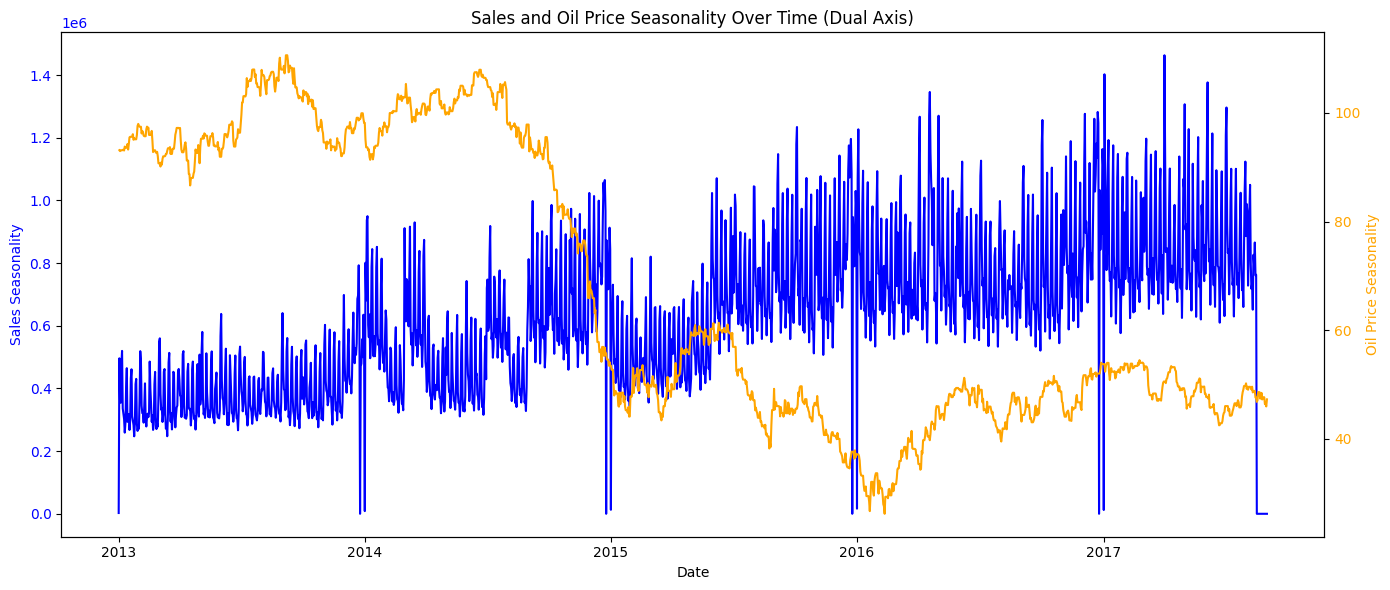

In [18]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Seasonality line for Sales
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales Seasonality', color='blue')  
ax1.plot(merged['date'], merged['sales'], color='blue', label='Sales Seasonality')
ax1.tick_params(axis='y', labelcolor='blue')

# Seasonality line for Oil Price
ax2 = ax1.twinx()
ax2.set_ylabel('Oil Price Seasonality', color='orange')  
ax2.plot(merged['date'], merged['dcoilwtico'], color='orange', label='Oil Price Seasonality')  
ax2.tick_params(axis='y', labelcolor='orange')

# Title and layout
plt.title('Sales and Oil Price Seasonality Over Time (Dual Axis)')
fig.tight_layout()
plt.show()


In [19]:
corr = merged['sales'].corr(merged['dcoilwtico'])
print("Pearson Correlation :",corr)

Pearson Correlation : -0.5776174237549563


## Observation
### From Two graphs and Pearson correlation, we can see the sales and dcoilwtico have Negative Correlation

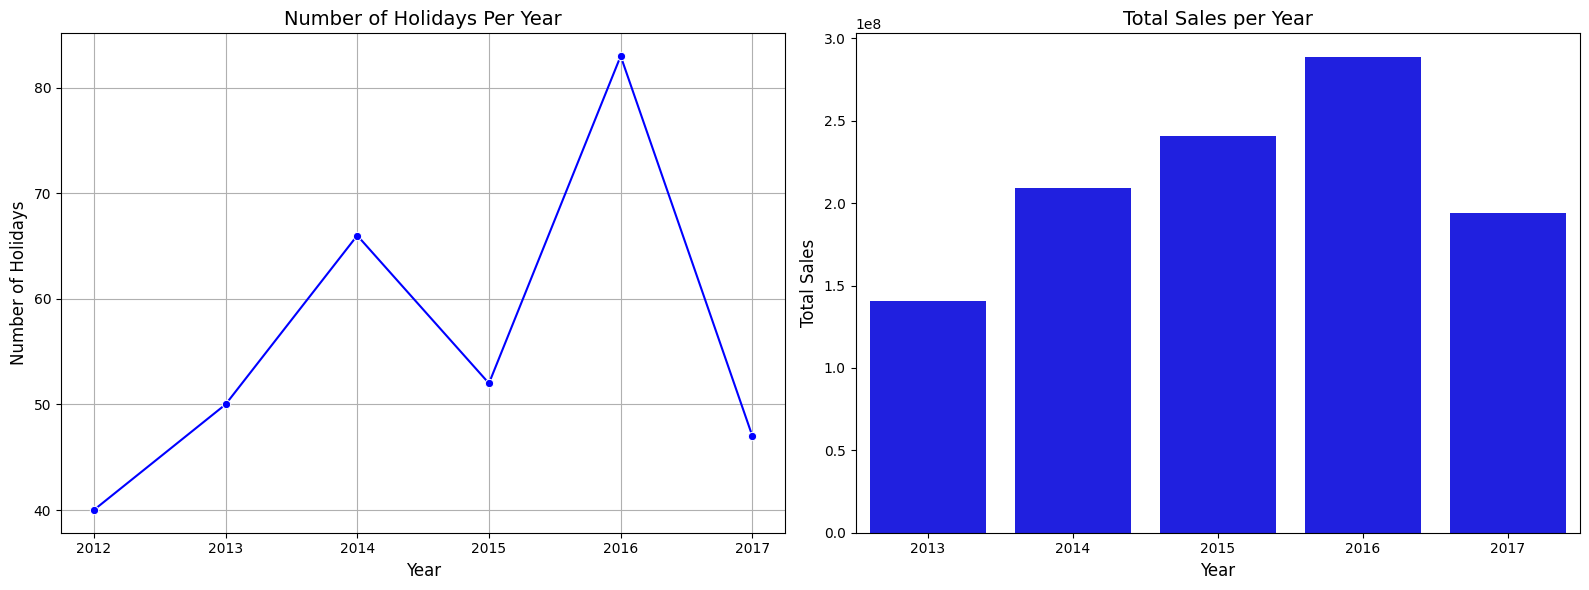

In [20]:
# Extract the year from the 'date' column in the holidays dataset
holidays["year"] = holidays["date"].dt.year

# Count the number of holidays per year
yearly_holidays = holidays.groupby("year").size()

# Extract the year from the 'date' column in the sales dataset
train['year'] = train['date'].dt.year

# Calculate total sales for each year
annual_sales = train.groupby('year')['sales'].sum().reset_index()

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line plot showing number of holidays per year
sns.lineplot(x=yearly_holidays.index, y=yearly_holidays.values, marker="o", color="blue", ax=axes[0])
axes[0].set_title("Number of Holidays Per Year", fontsize=14)
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Number of Holidays", fontsize=12)
axes[0].grid(True)

# Bar plot showing total sales per year with unified color
sns.barplot(x='year', y='sales', data=annual_sales, color='blue', ax=axes[1])  # Unified color blue
axes[1].set_title('Total Sales per Year', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Total Sales', fontsize=12)

# Adjust layout to avoid overlap and display the plots
plt.tight_layout()
plt.show()


In [21]:


# Extract holidays in the year 2016
holidays_2016 = holidays[holidays['date'].dt.year == 2016]

# Display the number of holidays in 2016
print("The number of holidays in 2016:", holidays_2016.shape[0])

# Extract unique holidays (in case there are multiple holidays on the same day)
unique_holidays_2016 = holidays_2016['date'].unique()

# Display the unique holidays
print("Number of unique holiday dates in 2016:", len(unique_holidays_2016))



The number of holidays in 2016: 83
Number of unique holiday dates in 2016: 72


## Observation
### 2016 has the most holidays in the dataset, which is an interesting observation. It could indicate that public holidays or special events may have had an influence on sales.

The earthquake in Ecuador in 2016 could have had a significant impact, both on the economic situation and potentially on consumer behavior in the region. Such events often influence purchasing patterns and store traffic.

### During 2016, sales increased around the holidays, which might be attributed to special events and the overall economic situation in that period. These spikes in sales could be related to increased consumer activity due to response to the earthquake.


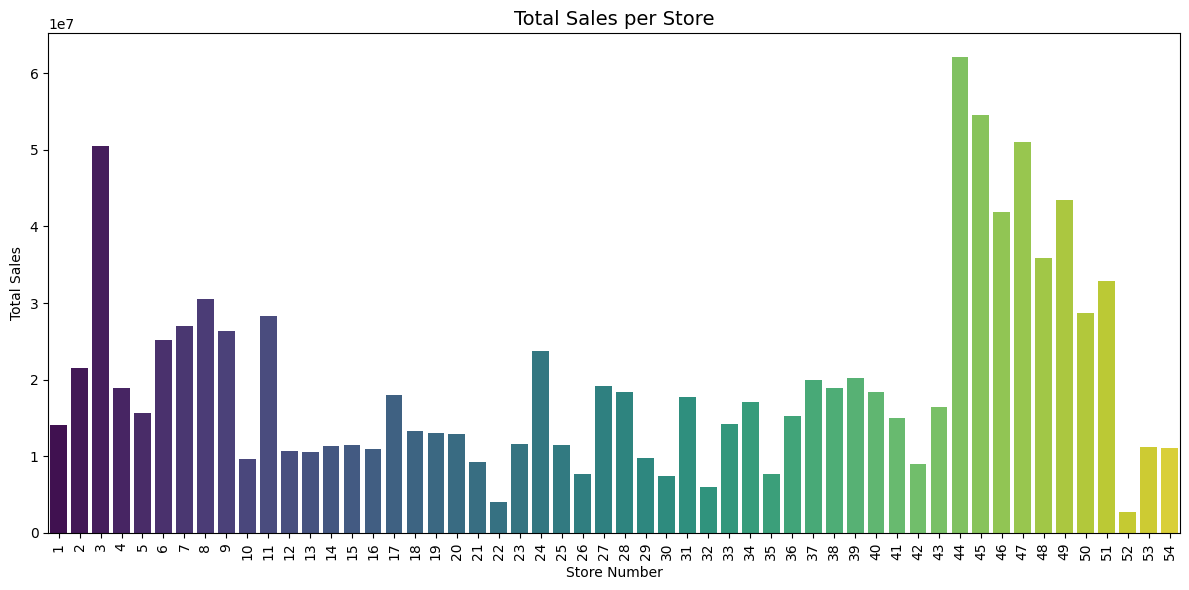

In [22]:
# Calculate total sales per store
store_sales = train.groupby('store_nbr')['sales'].sum().reset_index()
store_sales = store_sales.sort_values(by='sales', ascending=False)

# Bar plot for total sales per store
plt.figure(figsize=(12,6))
sns.barplot(x='store_nbr', y='sales', data=store_sales, palette='viridis')
plt.title('Total Sales per Store', fontsize=14)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 🏪 Store Types (`type` column)

In the `stores` dataset, the `type` column uses values like **A, B, C, D, E**, which represent internal classifications of store types. These classifications are likely based on:

- Store size (large/small)
- Geographic location
- Target customer segment
- Product variety or specialization

### 📊 Common Interpretation (based on EDA insights):

| Type | Likely Meaning                                | Observations from Analysis        |
|------|-----------------------------------------------|-----------------------------------|
| A    | Large flagship store                          | Usually has the highest sales     |
| B    | Medium-sized store                            | Good sales volume                 |
| C    | Small or local store                          | Lower sales compared to A and B   |
| D    | Specialized or limited-distribution store     | Could be seasonal or niche focus  |
| E    | Rare or newly classified store type           | Very few in number                |


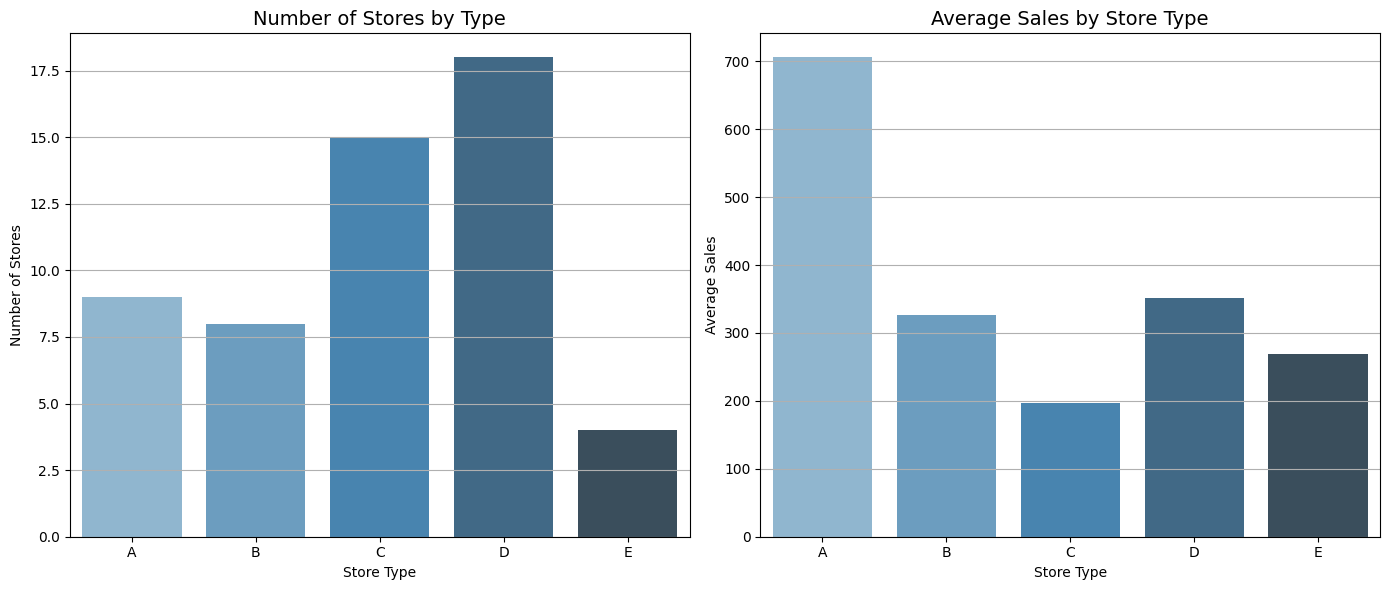

In [23]:
# --------- Data Preparation ---------
# Manual ordering for store types
type_order = ['A', 'B', 'C', 'D', "E"]

# Count of stores for each type
store_type_counts = stores['type'].value_counts().reindex(type_order).reset_index()
store_type_counts.columns = ['type', 'count']

# Merge sales data with store information
store_type_sales = train.merge(stores, on="store_nbr", how="left")
avg_sales_by_type = store_type_sales.groupby("type")["sales"].mean().reindex(type_order).reset_index()

# --------- Visualization ---------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Number of stores by type (ordered A -> D)
sns.barplot(ax=axes[0], x='type', y='count', data=store_type_counts, palette='Blues_d', order=type_order)
axes[0].set_title('Number of Stores by Type', fontsize=14)
axes[0].set_xlabel('Store Type')
axes[0].set_ylabel('Number of Stores')
axes[0].grid(axis='y')

# Plot 2: Average sales by store type
sns.barplot(ax=axes[1], x='type', y='sales', data=avg_sales_by_type, palette='Blues_d', order=type_order)
axes[1].set_title('Average Sales by Store Type', fontsize=14)
axes[1].set_xlabel('Store Type')
axes[1].set_ylabel('Average Sales')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


## 📌 Observation: High Sales Despite Fewer Type A Stores

Although **Type A** stores are **fewer in number** compared to other store types,  
they consistently achieve the **highest average sales**.

### 🔍 Interpretation:
- Type A stores likely represent **large, high-performing locations**.
- Their high sales suggest they serve **larger customer bases** or have **higher product variety** and availability.
- This indicates that **store size and location may have a greater impact on sales** than just the number of stores of each type.



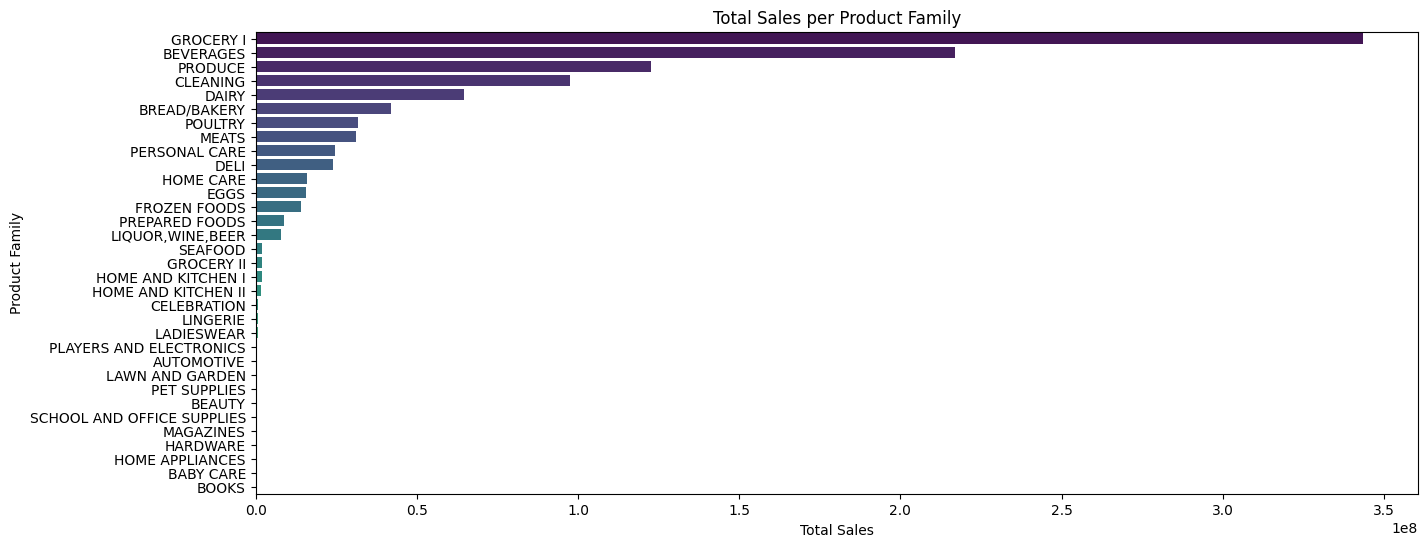

In [24]:
product_sales = train.groupby("family")["sales"].sum().reset_index()

product_sales = product_sales.sort_values(by="sales", ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x="sales", y="family", data=product_sales, palette="viridis")

plt.xlabel("Total Sales")
plt.ylabel("Product Family")
plt.title("Total Sales per Product Family")
plt.show()


## 📌 Observation: Sales Are Influenced by Product Family Type

From the analysis, it is evident that the **type of product family** a store sells significantly impacts its **sales performance**. Different product families show varying sales trends, with certain families driving higher sales than others.

### 🔍 Key Insights:
- Stores selling **popular product families** (e.g., beverages, fresh produce) generally experience **higher sales**.
- **Specialized or niche families** (e.g., luxury items, seasonal products) may exhibit **lower average sales**, but these products often have higher profit margins or experience sales spikes during certain times of the year.
- The range of product families available can also influence a store's **foot traffic**, affecting overall sales performance.




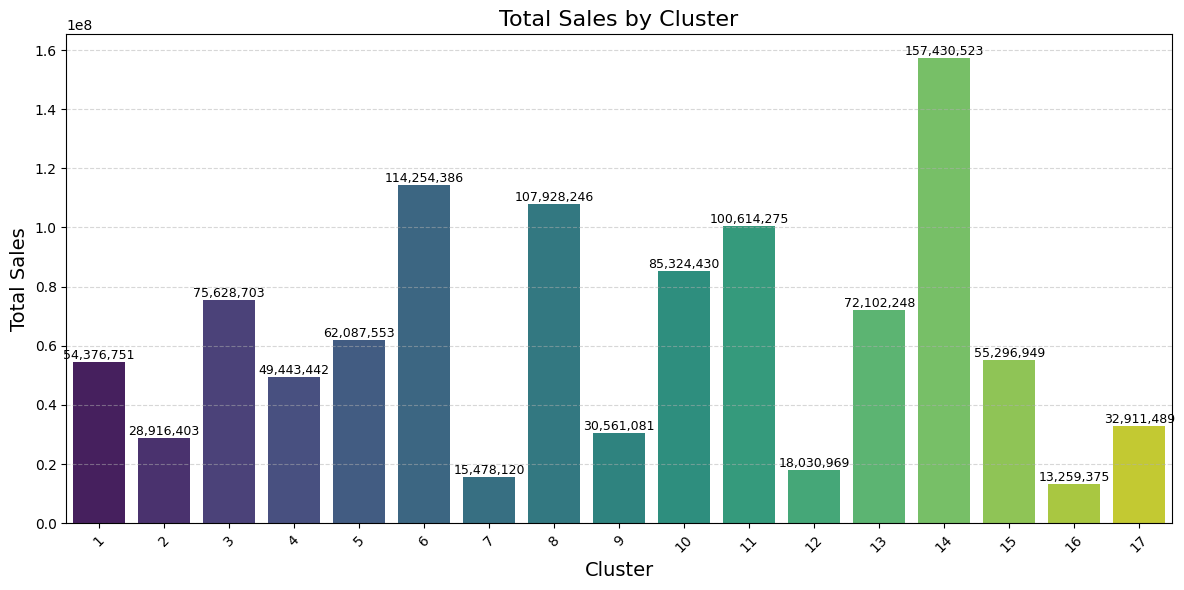

In [25]:

store_sales_total = train.groupby("store_nbr", as_index=False)["sales"].sum()

store_sales_cluster = store_sales_total.merge(
    stores[["store_nbr", "cluster"]], on="store_nbr", how="left"
)

cluster_sales = store_sales_cluster.groupby("cluster", as_index=False)["sales"].sum()
cluster_sales = cluster_sales.sort_values("cluster")

plt.figure(figsize=(12, 6))
sns.barplot(x="cluster", y="sales", data=cluster_sales, palette="viridis")

# تزيين الرسم
plt.title("Total Sales by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)


for index, row in cluster_sales.iterrows():
    plt.text(index, row['sales'], f"{int(row['sales']):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [26]:

store_cluster_sales = train.merge(stores, on='store_nbr', how='left')


cluster_summary = store_cluster_sales.groupby('cluster').agg({
    'sales': 'mean',
    'store_nbr': 'nunique',
    'type': lambda x: x.mode()[0],
    'city': lambda x: x.mode()[0],
    'state': lambda x: x.mode()[0]
}).reset_index()


cluster_summary.columns = ['Cluster', 'Avg_Sales', 'Store_Count', 'Most_Common_Type', 'Top_City', 'Top_State']


print(cluster_summary)


    Cluster    Avg_Sales  Store_Count Most_Common_Type   Top_City   Top_State
0         1   326.163967            3                D      Daule      Guayas
1         2   260.170621            2                D     Cuenca       Azuay
2         3   194.416262            7                C  Guayaquil      Guayas
3         4   296.572872            3                D       Loja      El Oro
4         5  1117.245254            1                A      Quito   Pichincha
5         6   342.661732            6                B      Quito   Pichincha
6         7   139.261863            2                C       Puyo  Chimborazo
7         8   647.377856            3                D      Quito   Pichincha
8         9   274.968339            2                D     Ambato   Pichincha
9        10   255.897546            6                E  Guayaquil      Guayas
10       11   603.507018            3                A      Quito   Pichincha
11       12   324.461406            1                C      Quit

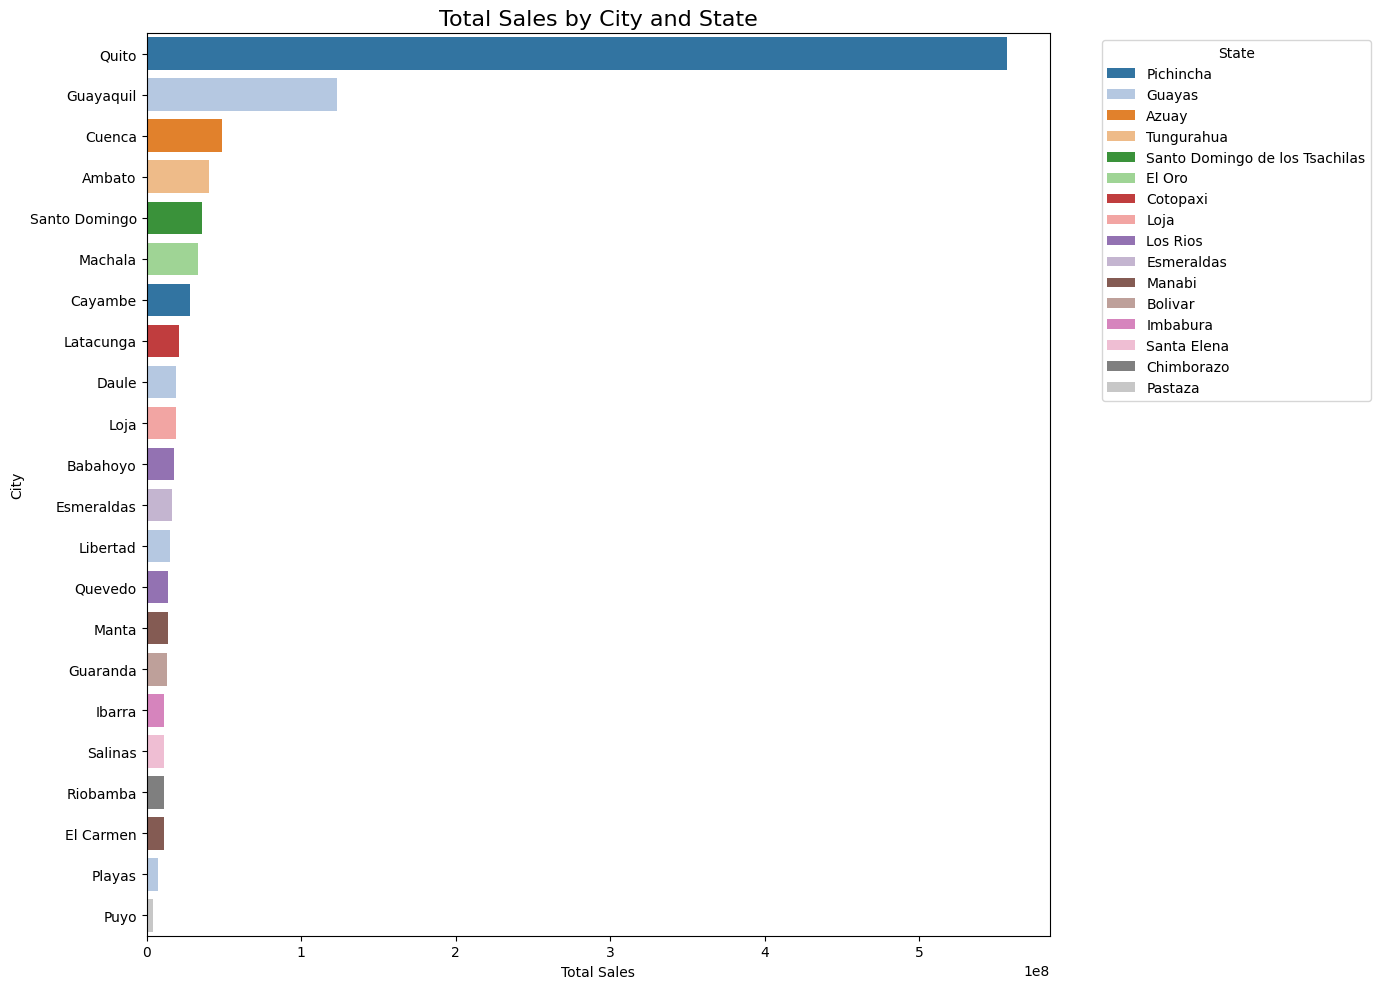

In [27]:


# Merge train data with stores to get city and state
sales_with_location = train.merge(stores, on='store_nbr', how='left')

# Group by city and state to calculate total sales
city_state_sales = sales_with_location.groupby(['state', 'city'])['sales'].sum().reset_index()

# Sort for better visualization
city_state_sales = city_state_sales.sort_values(by='sales', ascending=False)

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(data=city_state_sales, y='city', x='sales', hue='state', dodge=False, palette='tab20')

plt.title('Total Sales by City and State', fontsize=16)
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 🔍 Observation: Quito's High Sales and Cluster Association

The city of **Quito**, which belongs to **Cluster 14**, shows the **highest total sales** across all cities.  
This suggests that stores in Cluster 14 are located in a **high-performing urban area**, likely benefiting from strong customer demand, economic activity, or population density.  
Understanding the characteristics of Cluster 14 — such as store type, promotions, or customer behavior — could provide valuable insights for improving sales performance in other regions.


Pearson Correlation between Promotions and Sales: 0.4279
P-value: 0.0000


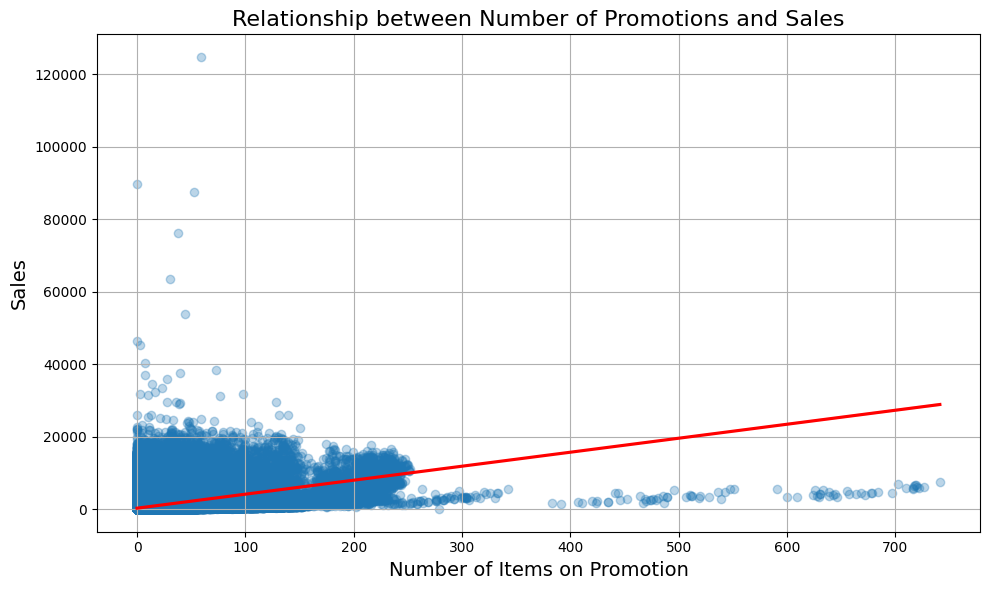

In [28]:

promo_sales = train.dropna(subset=["onpromotion", "sales"])

pearson_corr, p_value = pearsonr(promo_sales["onpromotion"], promo_sales["sales"])
print(f"Pearson Correlation between Promotions and Sales: {pearson_corr:.4f}")
print(f"P-value: {p_value:.4f}")


plt.figure(figsize=(10, 6))
sns.regplot(
    data=promo_sales,
    x="onpromotion",
    y="sales",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)


plt.title("Relationship between Number of Promotions and Sales", fontsize=16)
plt.xlabel("Number of Items on Promotion", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


Pearson Correlation between Transactions and Sales: 0.2148
P-value: 0.0000


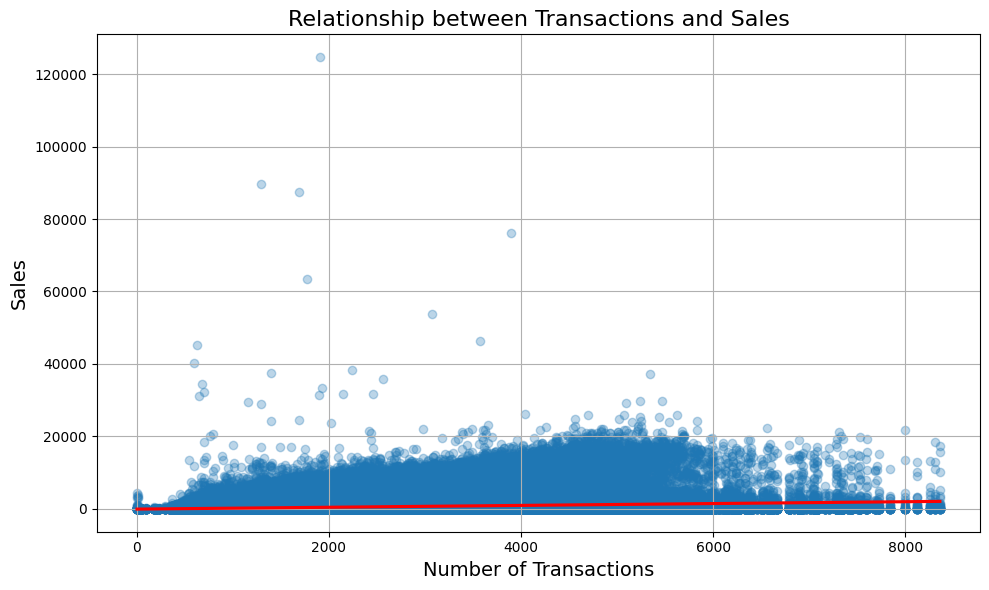

In [29]:

sales_transactions = train.merge(transactions, on=["store_nbr", "date"], how="inner")

sales_transactions = sales_transactions.dropna(subset=["sales", "transactions"])

pearson_corr, p_value = pearsonr(sales_transactions["transactions"], sales_transactions["sales"])
print(f"Pearson Correlation between Transactions and Sales: {pearson_corr:.4f}")
print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=sales_transactions,
    x="transactions",
    y="sales",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)

plt.title("Relationship between Transactions and Sales", fontsize=16)
plt.xlabel("Number of Transactions", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Key Drivers of Sales

Based on the exploratory data analysis and statistical insights, the following factors significantly impact sales:

1. **Store Type**  
   Type A stores, despite being fewer in number, have the highest average sales. This indicates higher customer traffic or store performance.

2. **Product Family**  
   Sales vary widely between families. Some categories like Beverages and Dairy consistently generate more revenue.

3. **Location (City & State)**  
   Stores located in cities like Quito (particularly Cluster 14) report significantly higher total sales compared to other areas.

4. **Promotions**  
   A positive correlation (~0.2) exists between the number of promoted products and sales volume, confirming the effectiveness of marketing campaigns.

5. **Transactions**  
   The number of transactions per day is positively correlated with sales, suggesting higher foot traffic increases revenue.

6. **Oil Prices**  
   There is a noticeable impact of **oil prices** on sales. As oil prices fluctuate, consumer spending patterns may change, with higher oil prices potentially reducing disposable income and, consequently, retail sales. Conversely, lower oil prices could lead to increased consumer spending, which may boost sales.

7. **Holidays**  
   **Holidays** have a direct effect on sales, as people tend to increase their spending during peak seasons like Christmas or national holidays. Stores tend to see a surge in sales during these periods, especially when combined with promotional activities. The effect of holidays can vary by location, as some areas may observe more holidays than others, leading to increased sales during these periods.


# Data Preparation for modeling

In [30]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,month,day_of_week,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,1,1,2013


In [31]:
train.describe()

,id,date,store_nbr,sales,onpromotion,month,day_of_week,year
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703087872,2.750000e+01,3.577757e+02,2.602770e+00,6.207838e+00,2.997031e+00,2.014838e+03
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.013000e+03
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,2.014000e+03
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,6.000000e+00,3.000000e+00,2.015000e+03
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00,9.000000e+00,5.000000e+00,2.016000e+03
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.200000e+01,6.000000e+00,2.017000e+03
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01,3.385668e+00,2.000740e+00,1.345518e+00


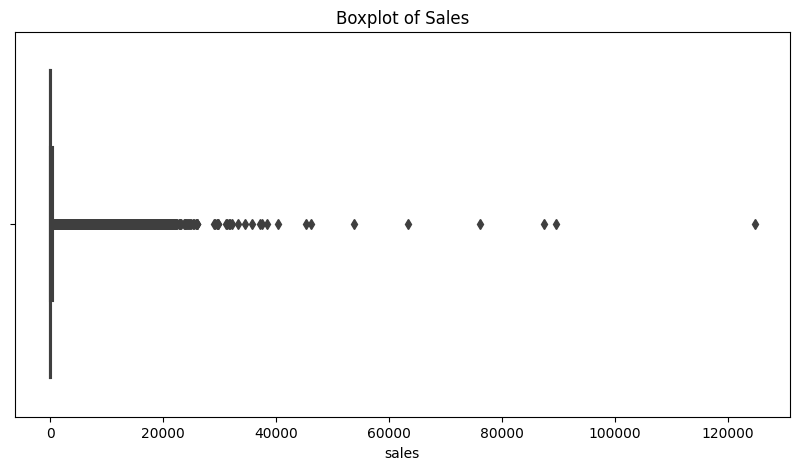

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=train['sales'])
plt.title('Boxplot of Sales')
plt.show()


In [33]:
train

,id,date,store_nbr,family,sales,onpromotion,month,day_of_week,year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,1,1,2013
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,8,1,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,8,1,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,8,1,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,8,1,2017


In [34]:
X = train.drop(columns=["sales"])
y = train["sales"]

In [35]:
X.head()

,id,date,store_nbr,family,onpromotion,month,day_of_week,year
0,0,2013-01-01,1,AUTOMOTIVE,0,1,1,2013
1,1,2013-01-01,1,BABY CARE,0,1,1,2013
2,2,2013-01-01,1,BEAUTY,0,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0,1,1,2013
4,4,2013-01-01,1,BOOKS,0,1,1,2013


In [36]:
y

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
3000883     438.133
3000884     154.553
3000885    2419.729
3000886     121.000
3000887      16.000
Name: sales, Length: 3000888, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [38]:
X_train.head()

,id,date,store_nbr,family,onpromotion,month,day_of_week,year
2869935,2869935,2017-06-03,34,MEATS,0,6,5,2017
78607,78607,2013-02-14,15,BABY CARE,0,2,3,2013
1532637,1532637,2015-05-13,12,HOME CARE,0,5,2,2015
2753557,2753557,2017-03-30,2,BOOKS,0,3,3,2017
227982,227982,2013-05-08,6,HOME CARE,0,5,2,2013


In [39]:
def prepare_datetime_features(df):
    # 🕒 Ensure the date is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # 🧩 Extract time-based features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Friday and Saturday

    # 🔄 Cyclical Encoding
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

    df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)


    df.drop(columns=['month', 'day', 'day_of_week',"id"], inplace=True)

    return df.head()


In [40]:
prepare_datetime_features(X_train)
prepare_datetime_features(X_test)
# for visualization
X_test_dates = X_test["date"]

X_train.drop(columns=["date"],axis = 1 , inplace=True)
X_test.drop(columns=["date"],axis = 1,  inplace=True)

In [41]:
# Create and fit the LabelEncoder
family_label_encoder = LabelEncoder()
X_train['family_encoded'] = family_label_encoder.fit_transform(X_train['family'])
X_test['family_encoded'] = family_label_encoder.transform(X_test['family'])

# Drop the original 'family' column
train.drop(columns=['family'], inplace=True)

# Save the encoder for future use
with open("family_label_encoder.pkl", "wb") as f:
    pickle.dump(family_label_encoder, f)

# Preview the result
train.head()


,id,date,store_nbr,sales,onpromotion,month,day_of_week,year
0,0,2013-01-01,1,0.0,0,1,1,2013
1,1,2013-01-01,1,0.0,0,1,1,2013
2,2,2013-01-01,1,0.0,0,1,1,2013
3,3,2013-01-01,1,0.0,0,1,1,2013
4,4,2013-01-01,1,0.0,0,1,1,2013


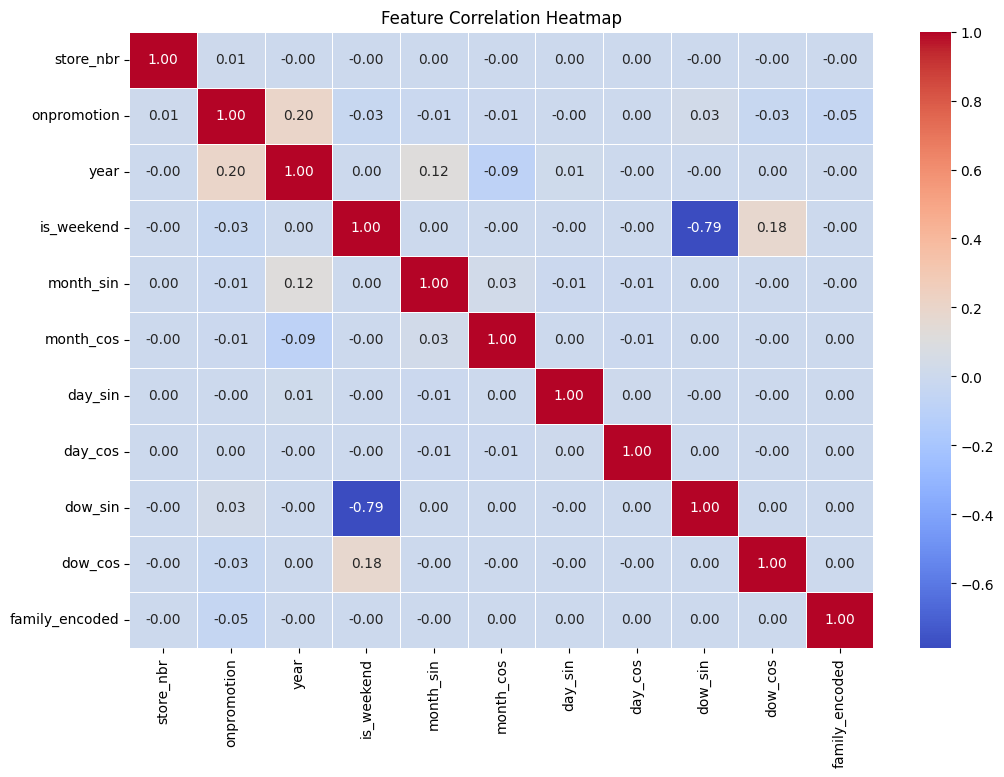

In [42]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [43]:
numerical_cols = ['onpromotion', 'year', 'is_weekend',
                  'month_sin', 'month_cos', 'day_sin', 'day_cos',
                  'dow_sin', 'dow_cos']

x_scaler = RobustScaler()
X_train = x_scaler.fit_transform(X_train[numerical_cols])
X_test = x_scaler.transform(X_test[numerical_cols])

with open("x_scaler.pkl", "wb") as f:
    pickle.dump(x_scaler, f)

 

In [44]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_scaler = RobustScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

with open("y_scaler.pkl", "wb") as f:
    pickle.dump(y_scaler, f)



In [45]:
y_train

array([[ 0.80012245],
       [-0.05612245],
       [-0.05612245],
       ...,
       [ 0.40306122],
       [ 0.05102041],
       [24.4744898 ]])

In [46]:
# ---------------------------
# 1. Define parameter grid
# ---------------------------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# ---------------------------
# 2. Grid Search
# ---------------------------
xgb = XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# ---------------------------
# 3. Best Model Evaluation
# ---------------------------
best_model = grid_search.best_estimator_

# Train performance
y_train_pred = best_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae  = mean_absolute_error(y_train, y_train_pred)
train_r2   = r2_score(y_train, y_train_pred)

print("\n✅ Train Performance:")
print(f"  - RMSE: {train_rmse:.2f}")
print(f"  - MAE : {train_mae:.2f}")
print(f"  - R²  : {train_r2:.2f}")

# Test performance
y_test_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae  = mean_absolute_error(y_test, y_test_pred)
test_r2   = r2_score(y_test, y_test_pred)

print("\n✅ Test Performance:")
print(f"  - RMSE: {test_rmse:.2f}")
print(f"  - MAE : {test_mae:.2f}")
print(f"  - R²  : {test_r2:.2f}")

# Best params
print("\n🔍 Best Hyperparameters:")
print(grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits

✅ Train Performance:
  - RMSE: 4.31
  - MAE : 1.77
  - R²  : 0.42

✅ Test Performance:
  - RMSE: 4.33
  - MAE : 1.78
  - R²  : 0.39

🔍 Best Hyperparameters:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [47]:
best_params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 200,
    'subsample': 1.0,
    'random_state': 42,
    'n_jobs': -1
}
model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

# 6) Evaluate on train & test
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae  = mean_absolute_error(y_train, y_train_pred)
train_r2   = r2_score(y_train, y_train_pred)

n_train = len(y_train)  # عدد العينات
p_train = X_train.shape[1]  # عدد المتغيرات (الميزات)
r2_adjusted_train = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)


test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae   = mean_absolute_error(y_test, y_test_pred)
test_r2    = r2_score(y_test, y_test_pred)

n_test = len(y_test)  # عدد العينات
p_test = X_test.shape[1]  # عدد المتغيرات (الميزات)
r2_adjusted_test = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)


print("\n Train Performance:")
print(f"  - RMSE: {train_rmse:.2f}")
print(f"  - MAE : {train_mae:.2f}")
print(f"  - R²  : {train_r2:.2f}")
print(f"  - Adjusted R²: {r2_adjusted_train:.2f}")

print("\n Test Performance:")
print(f"  - RMSE: {test_rmse:.2f}")
print(f"  - MAE : {test_mae:.2f}")
print(f"  - R²  : {test_r2:.2f}")
print(f"  - Adjusted R²: {r2_adjusted_test:.2f}")

with open("best_model.pkl","wb") as f:
    pickle.dump(model,f)



 Train Performance:
  - RMSE: 4.31
  - MAE : 1.77
  - R²  : 0.42
  - Adjusted R²: 0.42

 Test Performance:
  - RMSE: 4.33
  - MAE : 1.78
  - R²  : 0.39
  - Adjusted R²: 0.39
